# Assignment#5 ZHAO Dongwei SID:12432909

In [191]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.ticker import MaxNLocator
import pandas as pd

## 1.1 Following equation 1-2 (without the buffer effect), build a two-box model to compute the atmospheric CO2 level in ppm (parts per million) from 1987 to 2004.

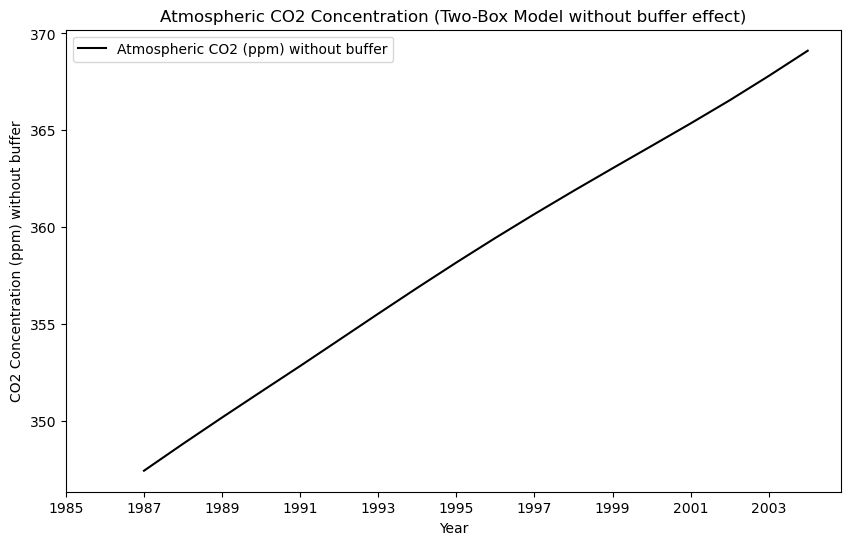

In [192]:
# 参数设置
k12 = 105 / 740   # 大气到海洋的传输系数
k21 = 102 / 900   # 海洋到大气的传输系数
gamma = 6.0       # 碳排放率 (单位PgC/yr)
dt = 1 / 12       # 时间步长（月，单位年）

# 初始条件
N1_initial_pg = 740
N2_initial_pg = 900 # PgC

# 转换ppm 
N1_initial_ppm = N1_initial_pg / 2.13
N2_initial_ppm = N2_initial_pg / 2.13
gamma_ppm = gamma / 2.13

def co2_model_without_buffer(t, y):
    N1, N2 = y
    dN1_dt = -k12 * N1 + k21 * N2 + gamma_ppm
    dN2_dt = k12 * N1 - k21 * N2
    return [dN1_dt, dN2_dt]

years = np.arange(1987, 2005)#时间序列
t_span = (0, len(years) - 1)
y0 = [N1_initial_ppm, N2_initial_ppm]#初始条件

#求解微分方程
solution_without_buffer = solve_ivp(co2_model_without_buffer, t_span, y0, t_eval=np.arange(len(years)))
N1_ppm_without_buffer = solution_without_buffer.y[0]#不考虑缓冲效应结果

# 可视化
plt.figure(figsize=(10, 6))
plt.plot(years, N1_ppm_without_buffer, label='Atmospheric CO2 (ppm) without buffer', color='black')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm) without buffer')
plt.title('Atmospheric CO2 Concentration (Two-Box Model without buffer effect)')
plt.xticks(np.arange(1985, 2005, 2))
plt.legend()
plt.grid(False)
plt.show()

## 1.2 [20 points] Following equation 3-4 (with the buffer effect), build a two-box model to compute the atmospheric CO2 level in ppm from 1987 to 2004.

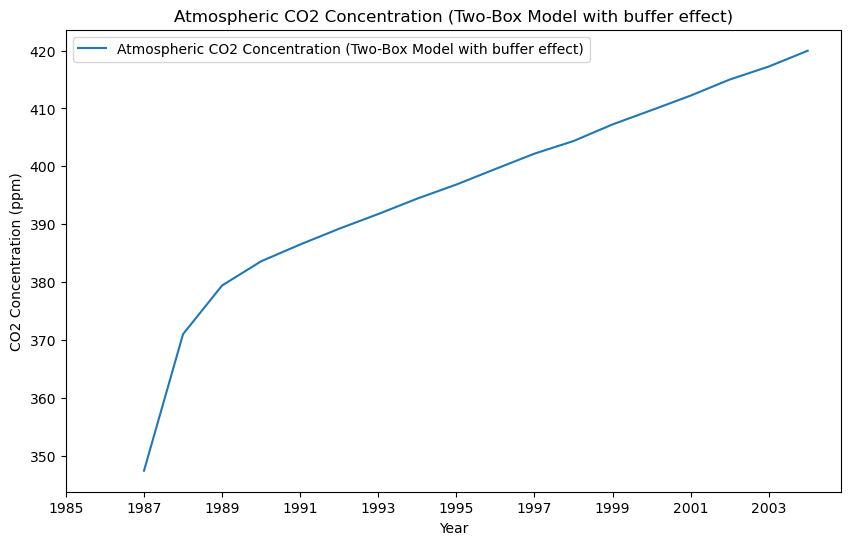

In [193]:
# 参数设置
k12 = 105 / 740   # 大气到海洋的传输系数
k21 = 102 / 900   # 海洋到大气的传输系数
gamma = 6.0       # 化石燃料碳排放率 (单位PgC/yr)

# 初始条件
N1_initial_pg = 740
N2_initial_pg = 900
# 海洋平衡碳浓度
N2_prime_pg = 821 # PgC

# 转换ppm 
N1_initial_ppm = N1_initial_pg / 2.13
N2_initial_ppm = N2_initial_pg / 2.13
N2_prime_ppm = N2_prime_pg / 2.13
gamma_ppm = gamma / 2.13 #ppm

def co2_model_with_buffer(t, y):
    N1, N2 = y
    #缓冲因子
    buffer_factor = 3.69 + 1.86e-2 * N1 - 1.8e-6 * N1**2

    dN1_dt = -k12 * N1 + k21 * (N2_prime_ppm + buffer_factor * (N2 - N2_prime_ppm)) + gamma_ppm
    dN2_dt = k12 * N1 - k21 * (N2_prime_ppm + buffer_factor * (N2 - N2_prime_ppm))
    return [dN1_dt, dN2_dt]

years = np.arange(1987, 2005)# 时间序列
t_span = (0, len(years) - 1)
# 初始条件
y0_buffer= [N1_initial_ppm, N2_initial_ppm]

# 求解微分方程
solution_with_buffer = solve_ivp(co2_model_with_buffer, t_span, y0_buffer, t_eval=np.arange(len(years)))
N1_ppm_with_buffer = solution_with_buffer.y[0]#考虑缓冲效应结果

#可视化
plt.figure(figsize=(10, 6))
plt.plot(years, N1_ppm_with_buffer, label='Atmospheric CO2 Concentration (Two-Box Model with buffer effect)')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Atmospheric CO2 Concentration (Two-Box Model with buffer effect)')
plt.xticks(np.arange(1985, 2005, 2))
plt.legend()
plt.grid(False)
plt.show()

## 1.3 [5 points] Based on your results from 1.1 and 1.2, reproduce Figure 2 in Tomizuka (2009) as much as you can.

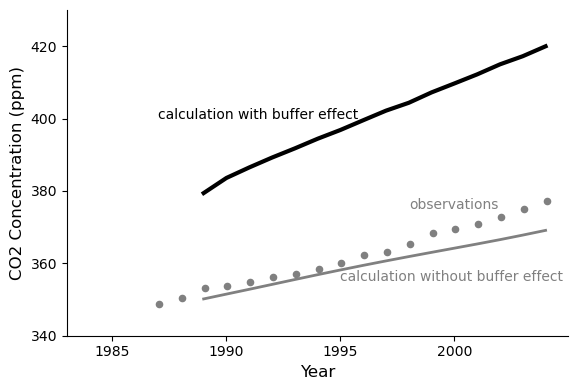

In [194]:
#观测数据
file_path = 'co2_mm_mlo.csv'
data = pd.read_csv(file_path, comment='#')
data = data[['year', 'month', 'decimal date', 'average']]

# 提取1987-2004年的数据
data = data[(data['year'] >= 1987) & (data['year'] <= 2004)]

# 选择部分数据点绘制
subset = data.iloc[::12, :]  # 每隔12个数据点取一个点

# 可视化
plt.figure(figsize=(6, 4))
plt.plot(years[2:], N1_ppm_with_buffer[2:], color='black', linewidth=3, label='Calculation with buffer effect')
plt.text(1987, 400, 'calculation with buffer effect', fontsize=10, color='black')#定位标签位置
plt.plot(years[2:], N1_ppm_without_buffer[2:], color='gray', linewidth=2, label='Calculation without buffer effect')
plt.text(1995, 355, 'calculation without buffer effect', fontsize=10, color='gray')#定位标签位置
plt.scatter(subset['decimal date'], subset['average'], color='gray', s=20, label='Observations')
plt.text(1998, 375, 'observations', fontsize=10, color='gray')#定位标签位置

plt.xlabel('Year', fontsize=12)
plt.ylabel('CO2 Concentration (ppm)', fontsize=12)
plt.xticks(np.arange(1985, 2005, 5))
plt.yticks(np.arange(340, 430, 20))
plt.xlim(1983, 2005)
plt.ylim(340, 430)
plt.grid(False)
# 移除顶部和右侧框
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

## [Bonus] [10 points] Following equation 5-13, compute the atmospheric CO2 level in ppm and reproduce Figure 4 in Tomizuka (2009).

In [195]:
#bouns
#数据准备，网站下载houghton土地利用对碳通量的1850-2000数据
import numpy as np
import pandas as pd
#线性插值1750-1850数据
# 设置年份范围：1750到1850
years = np.arange(1750, 1851)

# 设定1750和1850年的排放量（单位PgC）
flux_1750 = 0.2  # PgC
flux_1850 = 0.5  # PgC

# 线性插值，生成介于1750和1850年之间的排放量
flux_values_pg = np.linspace(flux_1750, flux_1850, len(years)) 

# 转换为TgC（1 PgC = 10^3 TgC）
flux_values_tg = flux_values_pg * 1000  # 将PgC转换为TgC

# 创建数据框架：1750-1850年的数据
df_1750 = pd.DataFrame({
    'Year': years,
    'Total Flux (TgC)': flux_values_tg
})
# print(df_1750)
# 读取Houghton的实际数据（假设文件路径为"houghtondata.txt"）
df = pd.read_csv('houghtondata.txt', delim_whitespace=True, skiprows=10)
first_column = df.iloc[:, 0]
last_column = df.iloc[:, -1]

# 将第一列和最后一列合并为一个新的数据框
df_1850 = pd.concat([first_column, last_column], axis=1)
df_1850.columns = ['Year', 'Total Flux (TgC)']
# print(df_1850)

# 合并 df_1750 和 df_1850
df_combined = pd.concat([df_1750, df_1850], ignore_index=True)

# 保存为 Land_use_1750_2000.txt 文件
df_combined.to_csv('Land_use_1750_2000.txt', sep='\t', index=False)

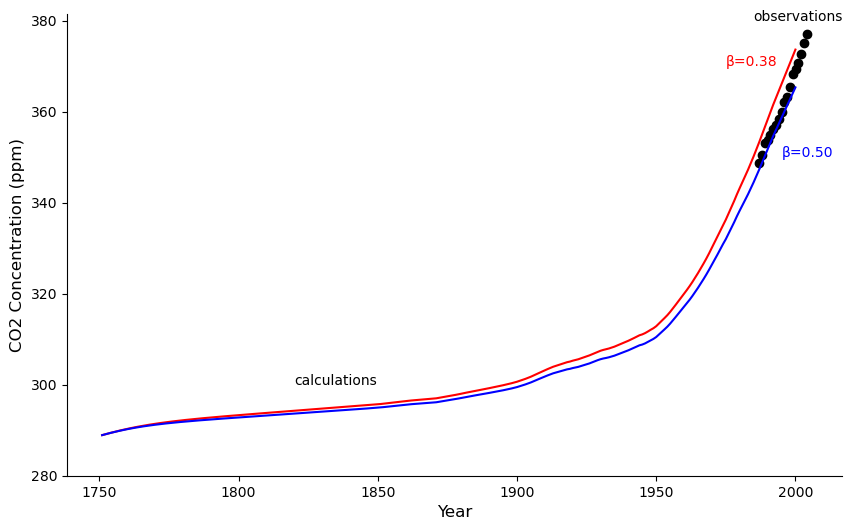

In [219]:
#Land use Carbon flux
Global_land_use = pd.read_csv('Land_use_1750_2000.txt', sep='\t') #TgC
# print(Global_land_use.columns)
Global_land_use = Global_land_use[['Year', 'Total Flux (TgC)']]
Global_land_use['LandUseChange'] = Global_land_use['Total Flux (TgC)'] / (1000 * 2.13) #ppm
# 化石燃料排放数据
Global_emissions= pd.read_csv('global.1751_2014.ems', skiprows=33, delim_whitespace=True)
Global_emissions['FossilFuelEmissions'] = Global_emissions['Total'] - Global_emissions['Production']
Global_emissions['EmissionFactor'] = Global_emissions['FossilFuelEmissions'] / (1000 * 2.13)
# print(Global_emissions.head)

# 传输系数
k12 = 60 / 615
k21 = 60 / 842
k23 = 9 / 842
k24 = 43 / 842
k32 = 52 / 9744
k34 = 162 / 9744
k43 = 205 / 26280
k45 = 0.2 / 26280
k51 = 0.2 / 90000000
k67 = 62 / 731
k71 = 62 / 1238

# 初始条件（ppm）
N1_0 = 615 / 2.13
N2_0 = 842 / 2.13
N3_0 = 9744 / 2.13
N4_0 = 26280 / 2.13
N5_0 = 90000000 / 2.13
N6_0 = 731 / 2.13
N7_0 = 1238 / 2.13

#设定f0和P0
f0 = 62 / 2.13
P0 = 615 / 2.13

#时间
years = np.arange(1751, 2001)

#设定beta值
beta_values = [0.38, 0.5]
results = []

# 计算 CO2 浓度
for beta in beta_values:
    N1, N2, N3, N4, N5, N6, N7 = N1_0, N2_0, N3_0, N4_0, N5_0, N6_0, N7_0
    atmosphere = []

    for year in years:
        gamma = Global_emissions[Global_emissions['Year'] == year]['EmissionFactor'].values[0]
        delta = Global_land_use[Global_land_use['Year'] == year]['LandUseChange'].values[0]

        xi = 3.69 + 0.0186 * N1 - 0.0000018 * N1**2
        f = f0 * (1 + beta * np.log(N1 / P0))

        # 计算每个部分的变化率
        dN1_dt = (-k12 * N1 + k21 * (N2_0 + xi * (N2 - N2_0)) + gamma - f + delta + k51 * N5 + k71 * N7)
        dN2_dt = (k12 * N1 - k21 * (N2_0 + xi * (N2 - N2_0)) - k23 * N2 + k32 * N3 - k24 * N2)
        dN3_dt = (k23 * N2 - k32 * N3 - k34 * N3 + k43 * N4)
        dN4_dt = (k34 * N3 - k43 * N4 + k24 * N2 - k45 * N4)
        dN5_dt = (k45 * N4 - k51 * N5)
        dN6_dt = (f - k67 * N6 - 2 * delta)
        dN7_dt = (k67 * N6 - k71 * N7 + delta)

        # 更新每个部分的值
        N1 += dN1_dt
        N2 += dN2_dt
        N3 += dN3_dt
        N4 += dN4_dt
        N5 += dN5_dt
        N6 += dN6_dt
        N7 += dN7_dt

        atmosphere.append(N1)

    results.append(atmosphere)

# 可视化
plt.figure(figsize=(10, 6))
plt.scatter(subset['decimal date'], subset['average'], label='Observations', color='black')#CO2观测数据
plt.text(1985, 380, 'observations', fontsize=10, color='black')#定位标签位置
plt.plot(years, results[0], color='red', label='β=0.38')
plt.text(1975, 370, 'β=0.38', fontsize=10, color='red')#定位标签位置
plt.plot(years, results[1], color='blue', label='β=0.50')
plt.text(1995, 350, 'β=0.50', fontsize=10, color='blue')#定位标签位置
plt.text(1820, 300, 'calculations', fontsize=10, color='black')#定位标签位置
plt.xlabel('Year', fontsize=12)
plt.ylabel('CO2 Concentration (ppm)', fontsize=12)
plt.xticks(np.arange(1750, 2010, 50))
plt.yticks(np.arange(280, 390, 20))
plt.grid(False)
# 移除顶部和右侧框
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()